## Explanation of BIC vs AIC

### Akaike Information Criterion (AIC)

Akaike Information Criterion (AIC) is a metric used for model selection that balances the goodness of fit of the model with the number of parameters used. The goal is to select a model that adequately explains the underlying process while avoiding overfitting. AIC is calculated using the formula:

$$ \text{AIC} = 2k - 2\ln(\hat{L}) $$

where:
- \( k \) is the number of parameters in the model.
- $$( \hat{L} )$$ is the maximized value of the likelihood function for the model.


AIC penalizes models with more parameters, encouraging the selection of simpler models when possible. It strikes a balance between model complexity and goodness of fit, providing a relative measure of model quality.


### Bayesian Information Criterion (BIC)

Bayesian Information Criterion (BIC), also known as Schwarz criterion, is another criterion for model selection that extends AIC by applying a stronger penalty for models with more parameters. BIC is calculated using the formula:

$$ \text{BIC} = \ln(n)k - 2\ln(\hat{L}) $$

where:
- \( n \) is the number of observations in the dataset.

BIC incorporates a logarithmic term based on the sample size \( n \), which increases the penalty for additional parameters compared to AIC. This makes BIC more conservative in selecting simpler models, especially with larger datasets.

### Differences and Considerations

- **Penalty for Parameters**: AIC penalizes models less harshly for additional parameters compared to BIC. Therefore, BIC tends to prefer simpler models more strongly when the dataset is large.
  
- **Sample Size Sensitivity**: BIC's penalty term includes a logarithmic factor of the sample size \( n \), which can influence model selection, particularly in situations where the sample size is not large.

- **Theoretical Underpinnings**: AIC is rooted in information theory and likelihood principles, while BIC incorporates Bayesian principles, aiming to balance model complexity with the evidence provided by the data.


Conditions for Agreement
Small Sample Sizes: When the sample size
𝑛
n is relatively small, the penalty term
ln
⁡
(
𝑛
)
𝑘
ln(n)k in BIC does not differ drastically from
2
𝑘
2k in AIC, leading both criteria to similar penalizations for complexity.

Strong Model Signal: When one model clearly fits the data significantly better than others, or when the complexity between competing models doesn't vary much (e.g., all models have a similar number of parameters), both AIC and BIC are likely to agree on the model choice.

Low Parameter Variance: In situations where the difference in the number of parameters among models is minimal, the influence of the differing penalty terms (linear vs. logarithmic) becomes less pronounced, making AIC and BIC results more likely to converge.

##AIC vs BIC for Polynomial Regression

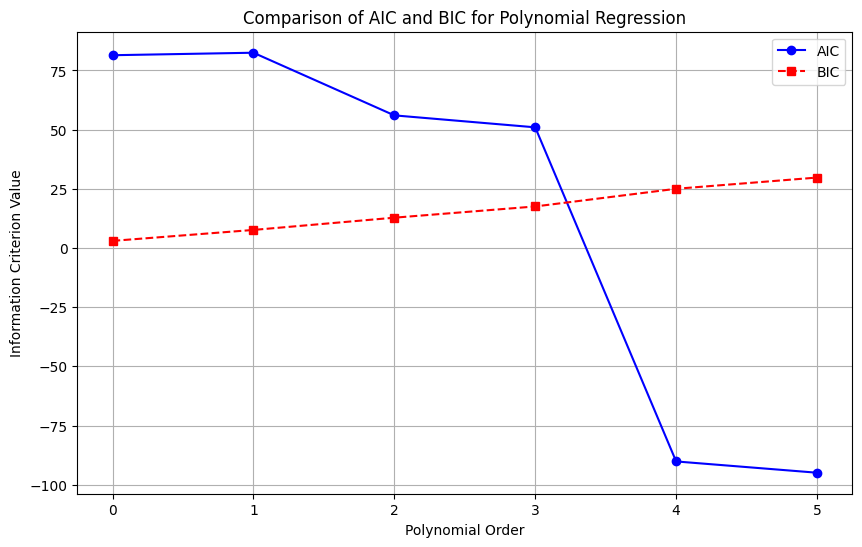

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
x_train = np.linspace(0, 10, 100)
y_train = 2 * np.sin(x_train) + np.random.normal(0, 0.5, 100)

# Function to create design matrix for polynomial regression
def make_design_matrix(x, order):
    X = np.ones((len(x), order + 1))
    for i in range(1, order + 1):
        X[:, i] = x ** i
    return X

# Function to solve polynomial regression using normal equations
def solve_poly_reg(x, y, max_order):
    theta_hats = {}
    for order in range(max_order + 1):
        X_design = make_design_matrix(x, order)
        theta_hat = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
        theta_hats[order] = theta_hat
    return theta_hats

# Function to evaluate MSE of polynomial regression models
def evaluate_poly_reg(x, y, theta_hats, max_order):
    mse_list = []
    for order in range(max_order + 1):
        X_design = make_design_matrix(x, order)
        y_hat = X_design @ theta_hats[order]
        mse = np.mean((y - y_hat) ** 2)
        mse_list.append(mse)
    return np.array(mse_list)

# Function to compute AIC
def compute_aic(sse, n, k):
    mse = sse / n
    aic = n * np.log(mse) + 2 * k
    return aic

# Function to compute BIC
def compute_bic(sse, n, k):
    mse = sse / n
    bic = k * np.log(n) - 2 * np.log(mse)
    return bic

# Cross-validation to determine best polynomial order
max_order = 5
theta_hats = solve_poly_reg(x_train, y_train, max_order)
mse_list = evaluate_poly_reg(x_train, y_train, theta_hats, max_order)

# Compute AIC and BIC for each order
n_train_samples = len(x_train)
aic_list = []
bic_list = []

for order in range(max_order + 1):
    sse = mse_list[order] * n_train_samples
    k = order + 1  # Number of parameters (order + 1 because of intercept)
    aic = compute_aic(sse, n_train_samples, k)
    bic = compute_bic(sse, n_train_samples, k)
    aic_list.append(aic)
    bic_list.append(bic)

# Visualize
order_list = list(range(max_order + 1))

plt.figure(figsize=(10, 6))
plt.plot(order_list, aic_list, marker='o', linestyle='-', color='b', label='AIC')
plt.plot(order_list, bic_list, marker='s', linestyle='--', color='r', label='BIC')
plt.xlabel('Polynomial Order')
plt.ylabel('Information Criterion Value')
plt.title('Comparison of AIC and BIC for Polynomial Regression')
plt.xticks(order_list)
plt.legend()
plt.grid(True)
plt.show()


##Demonstrate AIC and BIC Model Selection

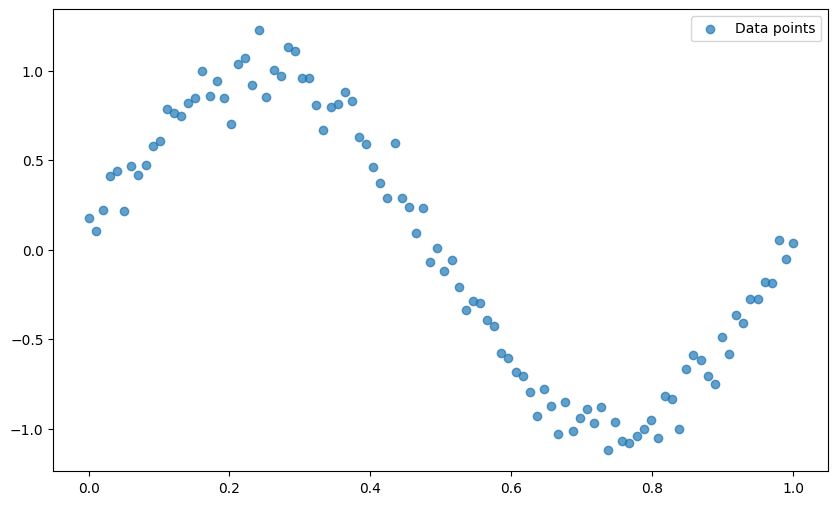

Degree 1: AIC = -149.37, BIC = -144.16
Degree 2: AIC = -148.09, BIC = -140.28
Degree 3: AIC = -414.23, BIC = -403.81
Degree 4: AIC = -412.24, BIC = -399.21
Degree 5: AIC = -465.82, BIC = -450.19
Degree 6: AIC = -463.87, BIC = -445.64
Best model by AIC is degree 5 with AIC = -465.82
Best model by BIC is degree 5 with BIC = -450.19
Second best model by AIC is degree 6 and may be considered optimal.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Generate some data
np.random.seed(0)
x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x) + np.random.normal(scale=0.1, size=x.shape)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, label='Data points')
plt.legend()
plt.show()

# Container for storing errors and criteria
models = []
aic_scores = []
bic_scores = []

# Fit polynomial models of increasing complexity
for degree in range(1, 7):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x[:, None])

    model = LinearRegression().fit(x_poly, y)
    y_pred = model.predict(x_poly)
    mse = mean_squared_error(y, y_pred)

    # Calculate number of parameters (weights and intercept)
    num_params = degree + 1
    n = len(y)

    # Calculate AIC and BIC
    aic = n * np.log(mse) + 2 * num_params
    bic = n * np.log(mse) + num_params * np.log(n)

    models.append((model, degree))
    aic_scores.append(aic)
    bic_scores.append(bic)

# Display the scores
for degree, aic, bic in zip(range(1, 7), aic_scores, bic_scores):
    print(f"Degree {degree}: AIC = {aic:.2f}, BIC = {bic:.2f}")


# Find model with the lowest AIC and BIC
best_aic_index = np.argmin(aic_scores)
best_bic_index = np.argmin(bic_scores)

print(f"Best model by AIC is degree {models[best_aic_index][1]} with AIC = {aic_scores[best_aic_index]:.2f}")
print(f"Best model by BIC is degree {models[best_bic_index][1]} with BIC = {bic_scores[best_bic_index]:.2f}")

# Check if the second-best model is within 2 points of AIC
sorted_aic_indices = np.argsort(aic_scores)
if abs(aic_scores[sorted_aic_indices[0]] - aic_scores[sorted_aic_indices[1]]) < 2:
    print(f"Second best model by AIC is degree {models[sorted_aic_indices[1]][1]} and may be considered optimal.")
